### IMPORTING THE NECESSARY LIBRARIES.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from keras.utils import np_utils
import h5py
import seaborn as sns
from skimage import color
from skimage import io
import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)


Using TensorFlow backend.


### LOADING THE DATASET.

In [2]:
data = h5py.File('C:\\Users\\HP\\Downloads\\SVHN_single_grey1 (1).h5', 'r')

### LEARNING THE ATTRIBUTES OF THE DATASET.

In [3]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
X_train=data['X_train']
X_test=data['X_test']
X_val=data['X_val']
y_train=data['y_train']
y_test=data['y_test']
y_val=data['y_val']

In [5]:
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


### RESHAPING THE DATA.

In [6]:
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

### NORMALIZING THE DATA.

In [7]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
X_val = preprocessing.normalize(X_val)

In [8]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000,) (18000,) (60000,)


### RESHAPING THE DATA FOR VISULISATION PURPOSES.

In [9]:
X_train = np.asarray(X_train).reshape(42000,32,32)
X_test = np.asarray(X_test).reshape(18000,32,32)
X_val = np.asarray(X_val).reshape(60000,32,32)

### VISULISATION OF THE DATA.

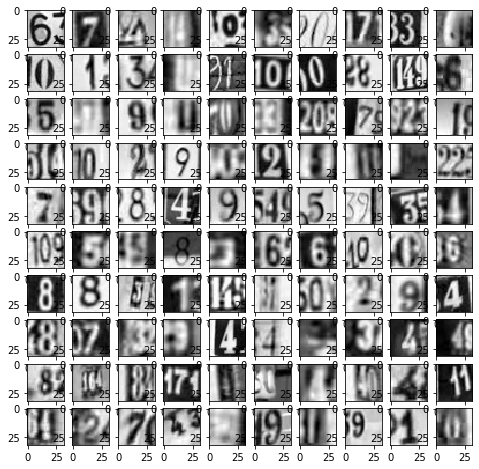

In [10]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img= X_train[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

### VISUALISING FIRST TEN ITEMS OF THE DATASET.

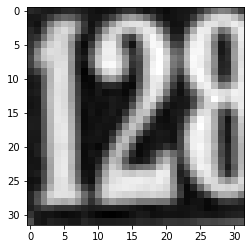

Label:  2


In [11]:
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

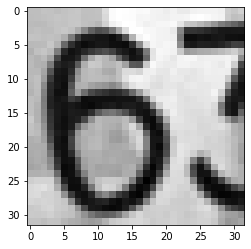

Label:  6


In [12]:
plt.imshow(X_train[1],cmap='gray')    
plt.show()
print('Label: ', y_train[1])

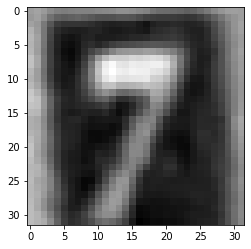

Label:  7


In [13]:
plt.imshow(X_train[2],cmap='gray')    
plt.show()
print('Label: ', y_train[2])

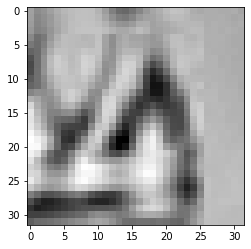

Label:  4


In [14]:
plt.imshow(X_train[3],cmap='gray')    
plt.show()
print('Label: ', y_train[3])

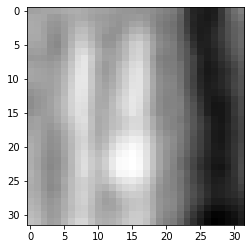

Label:  4


In [15]:
plt.imshow(X_train[4],cmap='gray')    
plt.show()
print('Label: ', y_train[4])

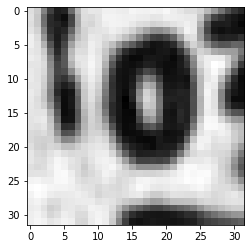

Label:  0


In [16]:
plt.imshow(X_train[5],cmap='gray')    
plt.show()
print('Label: ', y_train[5])

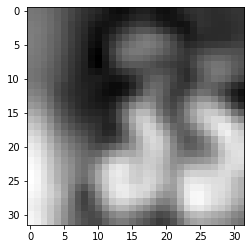

Label:  3


In [17]:
plt.imshow(X_train[6],cmap='gray')    
plt.show()
print('Label: ', y_train[6])

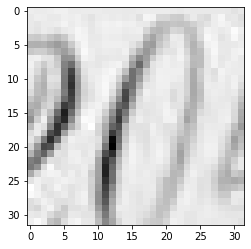

Label:  0


In [18]:
plt.imshow(X_train[7],cmap='gray')    
plt.show()
print('Label: ', y_train[7])

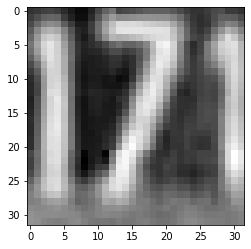

Label:  7


In [19]:
plt.imshow(X_train[8],cmap='gray')    
plt.show()
print('Label: ', y_train[8])

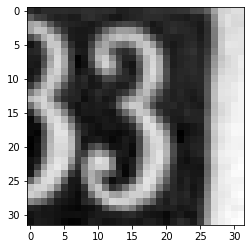

Label:  3


In [20]:
plt.imshow(X_train[9],cmap='gray')    
plt.show()
print('Label: ', y_train[9])

## DATA PREPROCESSING.

### RESHAPING THE X DATA

In [21]:
X_train = np.asarray(X_train).reshape(42000,1024)

X_test = np.asarray(X_test).reshape(18000,1024)

X_val = np.asarray(X_val).reshape(60000,1024)

### CONVERTING Y DATA INTO CATEGORICAL(ONEHOT VECTORS).

In [22]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [23]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## BUILDING A BASIC NN MODEL.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from keras import optimizers

In [25]:
model = Sequential()

In [26]:
model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model.add(Activation('relu'))

#Hidden Layer 1
model.add(Dense(256, kernel_initializer='he_normal'))
model.add(Activation('relu'))

#Hidden Layer 2
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))

#Hidden Layer 3
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('relu'))

#Hidden Layer 4
model.add(Dense(32, kernel_initializer='he_normal'))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
__________

### IMPLEMENTING SGD OPTIMIZER.

### COMPILING THE MODEL.

In [28]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42000/42000 [==============================] - 11s 255us/sample - loss: 2.3024 - acc: 0.1048 - val_loss: 2.3017 - val_acc: 0.1070
Epoch 2/10
42000/42000 [==============================] - 10s 242us/sample - loss: 2.3013 - acc: 0.1110 - val_loss: 2.3010 - val_acc: 0.1139
Epoch 3/10
42000/42000 [==============================] - 10s 239us/sample - loss: 2.3006 - acc: 0.1146 - val_loss: 2.3004 - val_acc: 0.1220
Epoch 4/10
42000/42000 [==============================] - 10s 240us/sample - loss: 2.3000 - acc: 0.1246 - val_loss: 2.2997 - val_acc: 0.1291
Epoch 5/10
42000/42000 [==============================] - 10s 239us/sample - loss: 2.2994 - acc: 0.1322 - val_loss: 2.2991 - val_acc: 0.1245
Epoch 6/10
42000/42000 [==============================] - 10s 238us/sample - loss: 2.2988 - acc: 0.1318 - val_loss: 2.2985 - val_acc: 0.1225
Epoch 7/10
42000/42000 [==============================] 

### EVALUATING THE MODEL

In [30]:
results_1 = model.evaluate(X_val, y_val)
print('Validation accuracy using sgd : ', results_1[1])

60000/60000 [==============================] - 9s 143us/sample - loss: 2.2960 - acc: 0.1616
Validation accuracy using sgd :  0.1616


### AS WE CAN SEE THE MODEL FAILS TO PERFORM WELL WITH A LOW ACCURACY OF 16%.

### WE TRY TO IMPLEMENT ADAM OPTIMIZER.

In [31]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 12s 296us/sample - loss: 2.2216 - acc: 0.1470 - val_loss: 1.9932 - val_acc: 0.2620
Epoch 2/10
42000/42000 [==============================] - 12s 279us/sample - loss: 1.7303 - acc: 0.3750 - val_loss: 1.5956 - val_acc: 0.4270
Epoch 3/10
42000/42000 [==============================] - 12s 277us/sample - loss: 1.5107 - acc: 0.4690 - val_loss: 1.4317 - val_acc: 0.5014
Epoch 4/10
42000/42000 [==============================] - 12s 278us/sample - loss: 1.3279 - acc: 0.5448 - val_loss: 1.2870 - val_acc: 0.5537
Epoch 5/10
42000/42000 [==============================] - 12s 278us/sample - loss: 1.2061 - acc: 0.5955 - val_loss: 1.1281 - val_acc: 0.6310
Epoch 6/10
42000/42000 [==============================] - 12s 275us/sample - loss: 1.0986 - acc: 0.6392 - val_loss: 1.0759 - val_acc: 0.6476
Epoch 7/10
42000/42000 [==============================] - 12s 275us/sample - loss: 1.0246 - acc: 0.6687 

In [33]:
results_2 = model.evaluate(X_val, y_val)
print('Validation accuracy using adam: ', results_2[1])

60000/60000 [==============================] - 9s 150us/sample - loss: 0.8872 - acc: 0.7126
Validation accuracy using adam:  0.7126


### WE CAN CLEARLY NOTE THAT THE ACCURACY OF THE MODEL IMPROVES AFTER USING ADAM OPTIMIZER FROM 16% TO 71%

### IMPLEMENTING SGD OPTIMIZER WITH LEARNING RATE 0.0001.

In [34]:
sgd = optimizers.SGD(lr = 0.0001)
    
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 256us/sample - loss: 0.7817 - acc: 0.7533 - val_loss: 0.7853 - val_acc: 0.7537
Epoch 2/10
42000/42000 [==============================] - 10s 239us/sample - loss: 0.7724 - acc: 0.7562 - val_loss: 0.7887 - val_acc: 0.7520
Epoch 3/10
42000/42000 [==============================] - 10s 234us/sample - loss: 0.7687 - acc: 0.7576 - val_loss: 0.7801 - val_acc: 0.7549
Epoch 4/10
42000/42000 [==============================] - 10s 238us/sample - loss: 0.7648 - acc: 0.7583 - val_loss: 0.7799 - val_acc: 0.7543 0.7668 - a - 
Epoch 5/10
42000/42000 [==============================] - 10s 237us/sample - loss: 0.7641 - acc: 0.7591 - val_loss: 0.7731 - val_acc: 0.7574
Epoch 6/10
42000/42000 [==============================] - 10s 239us/sample - loss: 0.7622 - acc: 0.7596 - val_loss: 0.7745 - val_acc: 0.7562
Epoch 7/10
42000/42000 [==============================] - 10s 234us/sample - loss: 0.7590 

In [35]:
results_3 = model.evaluate(X_val, y_val)
print('Validation accuracy using sgd with lr: ', results_3[1])

60000/60000 [==============================] - 9s 155us/sample - loss: 0.7734 - acc: 0.7558
Validation accuracy using sgd with lr:  0.75581664


### AS WE CAN NOTE THAT ADDING THE LEARNING RATE HYPERPARAMETER ON SGD WE CAN INCREASE OUR MODEL PERFORMANCE TO 16% FROM 75%.

### IMPLEMENTING ADAM OPTIMIZER WITH LEARNING RATE 0.0001

In [36]:
adam = optimizers.adam(lr = 0.0001)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 300us/sample - loss: 0.8364 - acc: 0.7322 - val_loss: 0.8367 - val_acc: 0.7291
Epoch 2/10
42000/42000 [==============================] - 12s 284us/sample - loss: 0.8003 - acc: 0.7433 - val_loss: 0.7782 - val_acc: 0.7518
Epoch 3/10
42000/42000 [==============================] - 12s 282us/sample - loss: 0.7718 - acc: 0.7531 - val_loss: 0.7609 - val_acc: 0.7588
Epoch 4/10
42000/42000 [==============================] - 12s 291us/sample - loss: 0.7538 - acc: 0.7574 - val_loss: 0.7551 - val_acc: 0.7627
Epoch 5/10
42000/42000 [==============================] - 12s 287us/sample - loss: 0.7291 - acc: 0.7668 - val_loss: 0.7109 - val_acc: 0.7762
Epoch 6/10
42000/42000 [==============================] - 12s 294us/sample - loss: 0.7016 - acc: 0.7760 - val_loss: 0.6755 - val_acc: 0.7868
Epoch 7/10
42000/42000 [==============================] - 12s 286us/sample - loss: 0.6908 - acc: 0.7806 

In [37]:
results_4 = model.evaluate(X_val, y_val)
print('Validation accuracy using adam with lr: ', results_4[1])

60000/60000 [==============================] - 10s 159us/sample - loss: 0.7033 - acc: 0.7781
Validation accuracy using adam with lr:  0.77811664


### AS WE CAN NOTE THAT ADDING THE LEARNING RATE HYPERPARAMETER ON ADAM WE CAN INCREASE OUR MODEL PERFORMANCE TO 71% FROM 77%.

In [38]:
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results_4[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.778117


### OUT OF ALL THE FOUR BASIC NN MODELS THE ADAM OPTIMIZER WITH LEARNING RATE 0.0001 PERFORMS THE BEST WITH 77% ACCURACY

## IMPLEMENTTING BATCH NORMALIZATION ON THE NN MODEL.

### (1) WITH ADAM OPTIMIZER.

In [39]:
model_1 = Sequential()

In [40]:
model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))

model_1.add(Dense(256, kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))

model_1.add(Dense(128, kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))

model_1.add(Dense(64, kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))

model_1.add(Dense(32, kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))

model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [41]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
__________

In [42]:
adam = optimizers.adam(lr = 0.0001)

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 17s 395us/sample - loss: 1.2196 - acc: 0.6234 - val_loss: 1.9272 - val_acc: 0.2810
Epoch 2/10
42000/42000 [==============================] - 14s 341us/sample - loss: 0.6852 - acc: 0.7886 - val_loss: 1.2800 - val_acc: 0.5922
Epoch 3/10
42000/42000 [==============================] - 14s 335us/sample - loss: 0.5431 - acc: 0.8309 - val_loss: 1.0184 - val_acc: 0.6778
Epoch 4/10
42000/42000 [==============================] - 14s 331us/sample - loss: 0.4615 - acc: 0.8572 - val_loss: 0.8109 - val_acc: 0.7605
Epoch 5/10
42000/42000 [==============================] - 14s 331us/sample - loss: 0.3986 - acc: 0.8751 - val_loss: 0.6636 - val_acc: 0.7919
Epoch 6/10
42000/42000 [==============================] - 14s 334us/sample - loss: 0.3514 - acc: 0.8900 - val_loss: 0.7261 - val_acc: 0.7712
Epoch 7/10
42000/42000 [==============================] - 14s 333us/sample - loss: 0.3119 - acc: 0.9034 

In [44]:
results_1 =model_1.evaluate(X_val, y_val)
print('Val_acc using batch adam : ', results_1[1])

60000/60000 [==============================] - 12s 199us/sample - loss: 0.6841 - acc: 0.8018
Val_acc using batch adam :  0.80183333


In [45]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.778117
2,NN_Batch_adam,0.801833


### WITH THE IMPLEMENTATIN OF BATCH NORMALIZATION (ADAM OPTIMIZER) ON OUR MODEL PERFORMANCE IMPROVES TO 80%

### (2) WITH SGD OPTIMIZER.

In [46]:
model_2 = Sequential()

In [47]:
model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(256, kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(128, kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(64, kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(32, kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(10))
model_2.add(Activation('softmax'))

In [48]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
__________

In [49]:
sgd = optimizers.sgd(lr = 0.0001)

model_2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 15s 345us/sample - loss: 2.2111 - acc: 0.2119 - val_loss: 2.3062 - val_acc: 0.1182
Epoch 2/10
42000/42000 [==============================] - 13s 301us/sample - loss: 1.8069 - acc: 0.4043 - val_loss: 2.0901 - val_acc: 0.2817
Epoch 3/10
42000/42000 [==============================] - 13s 308us/sample - loss: 1.5452 - acc: 0.5198 - val_loss: 1.5415 - val_acc: 0.5438
Epoch 4/10
42000/42000 [==============================] - 13s 301us/sample - loss: 1.3355 - acc: 0.6010 - val_loss: 1.2289 - val_acc: 0.6354
Epoch 5/10
42000/42000 [==============================] - 13s 299us/sample - loss: 1.1709 - acc: 0.6526 - val_loss: 1.0799 - val_acc: 0.6794
Epoch 6/10
42000/42000 [==============================] - 13s 306us/sample - loss: 1.0414 - acc: 0.6895 - val_loss: 0.9767 - val_acc: 0.7098
Epoch 7/10
42000/42000 [==============================] - 13s 306us/sample - loss: 0.9424 - acc: 0.7185 

In [51]:
results_2 = model_2.evaluate(X_val, y_val)
print('Val_acc using BatchNorm sgd : ', results_2[1])

60000/60000 [==============================] - 12s 200us/sample - loss: 0.7258 - acc: 0.7824
Val_acc using BatchNorm sgd :  0.7823667


In [52]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.778117
2,NN_Batch_adam,0.801833
3,NN_Batch_sgd,0.782367


### WITH THE IMPLEMENTATI0N OF BATCH NORMALIZATION (SGD OPTIMIZER) ON OUR MODEL PERFORMANCE IMPROVES TO 78%.

## IMPLEMENTING DROPOUT REGULARIZATION (LAMBDA=0.2).

In [53]:
model_3 = Sequential()

In [54]:
model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(256,kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(128, kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(64, kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(32, kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(10))
model_3.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [55]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_v1_10 (B (None, 512)               2048      
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_11 (B (None, 256)               1024      
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
__________

### (1) WITH SGD OPTIMIZER.

In [56]:
sgd= optimizers.sgd(lr = 0.0001)

model_3.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 17s 403us/sample - loss: 2.5237 - acc: 0.1178 - val_loss: 2.3077 - val_acc: 0.1129
Epoch 2/10
42000/42000 [==============================] - 15s 346us/sample - loss: 2.3098 - acc: 0.1586 - val_loss: 2.2552 - val_acc: 0.1919
Epoch 3/10
42000/42000 [==============================] - 14s 344us/sample - loss: 2.1830 - acc: 0.2031 - val_loss: 2.0563 - val_acc: 0.3334
Epoch 4/10
42000/42000 [==============================] - 14s 344us/sample - loss: 2.0795 - acc: 0.2497 - val_loss: 1.8567 - val_acc: 0.4150
Epoch 5/10
42000/42000 [==============================] - 14s 343us/sample - loss: 1.9866 - acc: 0.2896 - val_loss: 1.7307 - val_acc: 0.4652
Epoch 6/10
42000/42000 [==============================] - 15s 347us/sample - loss: 1.8964 - acc: 0.3232 - val_loss: 1.6330 - val_acc: 0.5008
Epoch 7/10
42000/42000 [==============================] - 15s 346us/sample - loss: 1.8180 - acc: 0.3556 

In [58]:
results_3 = model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout sgd : ', results_3[1])

60000/60000 [==============================] - 13s 213us/sample - loss: 1.3307 - acc: 0.5958
Val_acc using BatchNorm and Dropout sgd :  0.5958167


In [59]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_sgd'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.778117
2,NN_Batch_adam,0.801833
3,NN_Batch_sgd,0.782367
4,NN_Batch_Drop_sgd,0.595817


### WITH THE IMPLEMENTATI0N OF DROPOUT LAYER (LAMBDA=0.2) (SGD OPTIMIZER) ON OUR MODEL PERFORMANCE IS 59%.

### (2) WITH ADAM OPTIMIZER.

In [60]:
adam= optimizers.adam(lr = 0.0001)

model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [61]:
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 20s 469us/sample - loss: 1.3571 - acc: 0.5456 - val_loss: 1.2656 - val_acc: 0.5795c: 0.54
Epoch 2/10
42000/42000 [==============================] - 17s 405us/sample - loss: 1.0106 - acc: 0.6844 - val_loss: 1.4409 - val_acc: 0.5678
Epoch 3/10
42000/42000 [==============================] - 17s 397us/sample - loss: 0.8640 - acc: 0.7362 - val_loss: 1.1366 - val_acc: 0.6520
Epoch 4/10
42000/42000 [==============================] - 18s 422us/sample - loss: 0.7655 - acc: 0.7677 - val_loss: 0.6790 - val_acc: 0.7872
Epoch 5/10
42000/42000 [==============================] - 17s 397us/sample - loss: 0.7079 - acc: 0.7866 - val_loss: 0.8345 - val_acc: 0.7347
Epoch 6/10
42000/42000 [==============================] - 17s 404us/sample - loss: 0.6698 - acc: 0.8012 - val_loss: 0.7377 - val_acc: 0.7679
Epoch 7/10
42000/42000 [==============================] - 17s 406us/sample - loss: 0.6224 - acc: 

In [62]:
results_4 = model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_4[1])

60000/60000 [==============================] - 14s 229us/sample - loss: 0.8396 - acc: 0.7619
Val_acc using BatchNorm and Dropout adam :  0.76191664


In [63]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_4[1]]},index={'5'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.778117
2,NN_Batch_adam,0.801833
3,NN_Batch_sgd,0.782367
4,NN_Batch_Drop_sgd,0.595817
5,NN_Batch_Drop_adam,0.761917


### WITH THE IMPLEMENTATI0N OF DROPOUT LAYER (LAMBDA=0.2) (ADAM OPTIMIZER) ON OUR MODEL PERFORMANCE IS 76%.

## IMPLEMENTING DROPOUT REGULARIZATION (LAMBDA=0.5).

In [64]:
model_4 = Sequential()

In [65]:
model_4.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Dense(256,kernel_initializer='he_normal'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Dense(128, kernel_initializer='he_normal'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Dense(64, kernel_initializer='he_normal'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Dense(32, kernel_initializer='he_normal'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Dense(10))
model_4.add(Activation('softmax'))

In [66]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_v1_15 (B (None, 512)               2048      
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_16 (B (None, 256)               1024      
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
__________

### (1) SGD OPTIMIZER.

In [67]:
sgd= optimizers.sgd(lr = 0.0001)

model_4.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [68]:
history_4 = model_4.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 19s 445us/sample - loss: 2.7375 - acc: 0.0992 - val_loss: 2.3194 - val_acc: 0.1033
Epoch 2/10
42000/42000 [==============================] - 16s 389us/sample - loss: 2.5685 - acc: 0.1023 - val_loss: 2.3092 - val_acc: 0.1071
Epoch 3/10
42000/42000 [==============================] - 16s 370us/sample - loss: 2.4859 - acc: 0.1000 - val_loss: 2.2971 - val_acc: 0.1254
Epoch 4/10
42000/42000 [==============================] - 16s 373us/sample - loss: 2.4353 - acc: 0.1041 - val_loss: 2.2905 - val_acc: 0.1438
Epoch 5/10
42000/42000 [==============================] - 16s 378us/sample - loss: 2.3975 - acc: 0.1036 - val_loss: 2.2883 - val_acc: 0.1514
Epoch 6/10
42000/42000 [==============================] - 16s 374us/sample - loss: 2.3781 - acc: 0.1030 - val_loss: 2.2874 - val_acc: 0.1545
Epoch 7/10
42000/42000 [==============================] - 16s 373us/sample - loss: 2.3606 - acc: 0.1046 

In [69]:
results_5 = model_4.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout sgd : ', results_5[1])

60000/60000 [==============================] - 14s 234us/sample - loss: 2.2857 - acc: 0.1618
Val_acc using BatchNorm and Dropout sgd :  0.16175


In [70]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_sgd'], 'accuracy': [results_5[1]]},index={'6'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.778117
2,NN_Batch_adam,0.801833
3,NN_Batch_sgd,0.782367
4,NN_Batch_Drop_sgd,0.595817
5,NN_Batch_Drop_adam,0.761917
6,NN_Batch_Drop_sgd,0.161750


### WITH THE IMPLEMENTATI0N OF DROPOUT LAYER (LAMBDA=0.5) (SGD OPTIMIZER) ON OUR MODEL ,PERFORMANCE IS 16%.

### (2) ADAM OPTIMIZER.

In [71]:
adam= optimizers.adam(lr = 0.0001)

model_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [72]:
history_4 = model_4.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 22s 515us/sample - loss: 2.2785 - acc: 0.1304 - val_loss: 2.1178 - val_acc: 0.2264
Epoch 2/10
42000/42000 [==============================] - 18s 427us/sample - loss: 2.0259 - acc: 0.2333 - val_loss: 3.0308 - val_acc: 0.1798
Epoch 3/10
42000/42000 [==============================] - 18s 432us/sample - loss: 1.7812 - acc: 0.3171 - val_loss: 1.8146 - val_acc: 0.3130
Epoch 4/10
42000/42000 [==============================] - 18s 432us/sample - loss: 1.6587 - acc: 0.3764 - val_loss: 1.5840 - val_acc: 0.4078
Epoch 5/10
42000/42000 [==============================] - 18s 434us/sample - loss: 1.5541 - acc: 0.4176 - val_loss: 1.3572 - val_acc: 0.5192
Epoch 6/10
42000/42000 [==============================] - 18s 436us/sample - loss: 1.4777 - acc: 0.4447 - val_loss: 1.3296 - val_acc: 0.5273
Epoch 7/10
42000/42000 [==============================] - 18s 432us/sample - loss: 1.4222 - acc: 0.4748 

In [73]:
results_6 = model_4.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_6[1])

60000/60000 [==============================] - 16s 265us/sample - loss: 0.9914 - acc: 0.6700
Val_acc using BatchNorm and Dropout adam :  0.6699833


In [74]:
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_6[1]]},index={'7'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.778117
2,NN_Batch_adam,0.801833
3,NN_Batch_sgd,0.782367
4,NN_Batch_Drop_sgd,0.595817
5,NN_Batch_Drop_adam,0.761917
6,NN_Batch_Drop_sgd,0.161750
7,NN_Batch_Drop_adam,0.669983


### WITH THE IMPLEMENTATI0N OF DROPOUT LAYER (LAMBDA=0.5) (ADAM OPTIMIZER) ON OUR MODEL PERFORMANCE IS 66%.

### AS WE CAN SEE AFTER INCREASING THE VALUE OF LAMBDA THE MODEL PERFORMANCE FALLS DOWN. SO IN THIS CASE SMALL VALUE OF LAMBDA WORKS BETTER.

### OUT OF ALL THE MODELS THE MODEL WITH BATCH NORMALIZATION AND ADAM OPTIMIZER PERFORMS THE BEST WITH 80% ACCURACY

## VALIDATING THE MODEL PERFORMANCE.

In [75]:
X_train = np.asarray(X_train).reshape(42000,32,32)
X_test = np.asarray(X_test).reshape(18000,32,32)
X_val = np.asarray(X_val).reshape(60000,32,32)

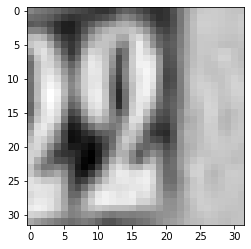

Label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [80]:
plt.imshow(X_val[11078],cmap='gray')    
plt.show()
print('Label: ', y_val[11078])

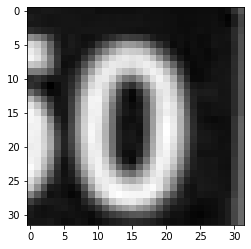

Label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [77]:
plt.imshow(X_val[1],cmap='gray')    
plt.show()
print('Label: ', y_val[1])

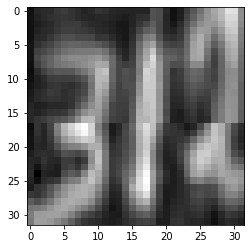

Label:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [78]:
plt.imshow(X_val[4444],cmap='gray')    
plt.show()
print('Label: ', y_val[4444])

### THE ARRAY IS REPRESENTED AS ONE HOT VECTOR VALUES WHERE THE FIRST ELEMENT REPRESENTS 0 , SECOND ELEMENT REPRESENTS 1 AND SO ON.
### THE ELEMENT WHICH HAS VALUE '1' REPRESENTS NUMBER REPRESENTED BY THE INDEX. 

### WE CAN SEE THAT OUR MODEL CORRECTLY RECOGNISES THE NUMBERS IN THE IMAGES.